# Project Report
jupyter nbconvert --to html docs/anaconda_projects/db/report.ipynb

# Introduction
This project aims to aid users in making preflop poker decisions, based on a number of variables that the user can input. it relies on poker theory imbedded in a solver-based poker dataset, meaning the model is trained on data that consists of preflop scenarios that are labeled with objectively correct decisions. In addition to this, synthetic data has been added to further improve the model accuracy and to help with modeling scenarios frequently encountered in real-life situations. The user can both use the package in a python environment or can opt to use the browser-based Streamlit app, created for easy usage of the package. 

# Dataset Description
Dataset used:
- Source: RZ412/PokerBench on Hugging Face
- File: preflop_60k_train_set_game_scenario_information.csv
- Size: ~60,000 hands

Key Columns:
- hero_holding – the player’s two cards
- prev_line – prior betting actions
- correct_decision – solver-recommended action
- hero_pos – player’s position at the table

# Data Processing
- Normalizing hero_holding (e.g., AsKh -> AKo) 
    + s = spades
    + h = hearts
    + o = offsuit
- Categorized hands (e.g., 99 = pair)
- Estimated hand strength (e.g., AA = 1.0, 8Jo = 0.5)
- Parsed betting context from prev_line
    + Extracted missing moves (e.g., folds were not always mentioned)
- Used order of play to determine action before hero's turn
- Normalized solver's actions (e.g., 2.5bb = raise, 11.0bb = raise (in prev_line))


# Class Balancing and Label Encoding
Class imbalance handling
- Raise: 8000 hands
- Call: 8000 hands
- Fold: 8000 hands
With added synthetic data
- Raise: 9000 hands
- Call: 8000 hands
- Fold: 11000 hands
Folds happen much more often than calls or raises, meaning that the higher amount of folds is proportionate to real life decision proportions.

Target labels encoding
- Raise: 2
- Call: 0
- Fold: 1

# Model Training
Model: XGBoostClassifier
- Loss: mlogloss
- Balanced sample weights
- 80/20 Train/Test split
- One-hot encoding for categorical variables (hero_pos, hand_category, etc.)

## Project Structure

```text
poker-decisions/
├── src/
│   ├── app.py                  # Streamlit app UI
│   └── HoldemHelper/
│       ├── import_dataset.py   # Dataset generation & model training
│       ├── recommend.py        # Prediction logic
│       ├── hand_strengths.py   # Predefined hand strengths
│       └── ...                 # Additional utilities
├── model/                      # Trained model artifacts (.pkl)
├── src/images/                 # Flowchart and UI screenshots
└── README.md
```

# Installing the package
To install the package:
```bash
git clone https://github.com/Programming-The-Next-Step-2025/poker-decisions.git
cd poker-decisions
pip install -e .
```
This manner of installation ensures you are able to make full use of the package's functions, with further instructions below on what arguments can be inputted.

# Using the package
As previously mentioned, the package can be used as a standalone package:
```python
import HoldemHelper

decision, probs = HoldemHelper.recommender.recommend(
    hero_holding = "Th9h", 
    hero_pos = "CO", 
    prev_line = "UTG/call/HJ/2.5bb", 
    num_players_still_in = 6
    )
print("Decision:", decision)
print("Probabilities:", probs)
```

However, the package can be used most easily when using the Streamlit app:
```bash
pip install --upgrade streamlit
# Or with conda:
conda update streamlit
```
```bash
python3.12 -m streamlit run src/app.py
```

# App Design
The GUI has several elements:
Introduction: The text atop of the page introduces the app and provides some additional information. For one, it points out to the user that every box has a help-icon, which allows the user to hover over and read a description of how the respective box is used. Additionally, it provides the user with al ink to a page describing the rules of Texas Hold'em poker.
(1) Select your cards
+ The 'Card 1 rank' and 'Card 2 rank' drop-down menu allow you to input your card ranks, meaning that you choose 2, 3, 4, 5, 6, 7, 8, 9, T, J, Q, K, or A, corresponding to the cards the hero (you) hold in the scenario.
+ The 'Card 1 suit' and 'Card 2 suit' multiple-choice menu allow you to select the suit corresponding to the respective card, being spades, hearts, diamonds, or clubs.
+ The 'Hero Position' allows you to input the position of the hero (you) in the scenario, where the choices are between UTG, HJ, CO, BTN, SB, and BB. Below this box is an expandable image depicting the different positions on the poker table, to help the user figure out the correct position, if needed.
(2) Previous actions
+ The 'Number of Previous Actions' box allows the user to select the amount of actions that happened before the decision that they want a recommendation for. The maximum number of actions are 15. If a players action is not included in this section, the model assumes this player folded.
+ After selecting the amount of players actions, the same number of rows fold open, where the user can input the position and action for the respective player. The choice of positions is the same as the choice of the hero positions. Then an action (i.e., call, fold, or raise) can be selected for every player. If raise is chosen, an additional text-input box opens up where the user can input the amount raised by the respective player upto two decimals. 
All the user needs to do after this is press the 'Get Recommendation' button and it outputs the 'Recommended Action', being fold, call, or raise. It also outputs a graph showing the different 'Prediction Probabilities'.

Below are several images that depict:
(1) The steps the user should take to use the package (properly)
(2) How to launch the Streamlit app
(3) Example inputs for the Streamlit app
(4) The subsequent output

## Flowchart of User Interaction


In [ ]:
from IPython.display import Image, display
display(Image(filename="/Users/maximkurvink/Documents/GitHub/poker-decisions/src/images/flowchart_image.png"))

## Example Usage

Launching the App

In [ ]:
from IPython.display import Image, display
display(Image(filename="/Users/maximkurvink/Documents/GitHub/poker-decisions/src/images/streamlit_launch.png"))


Input Interface

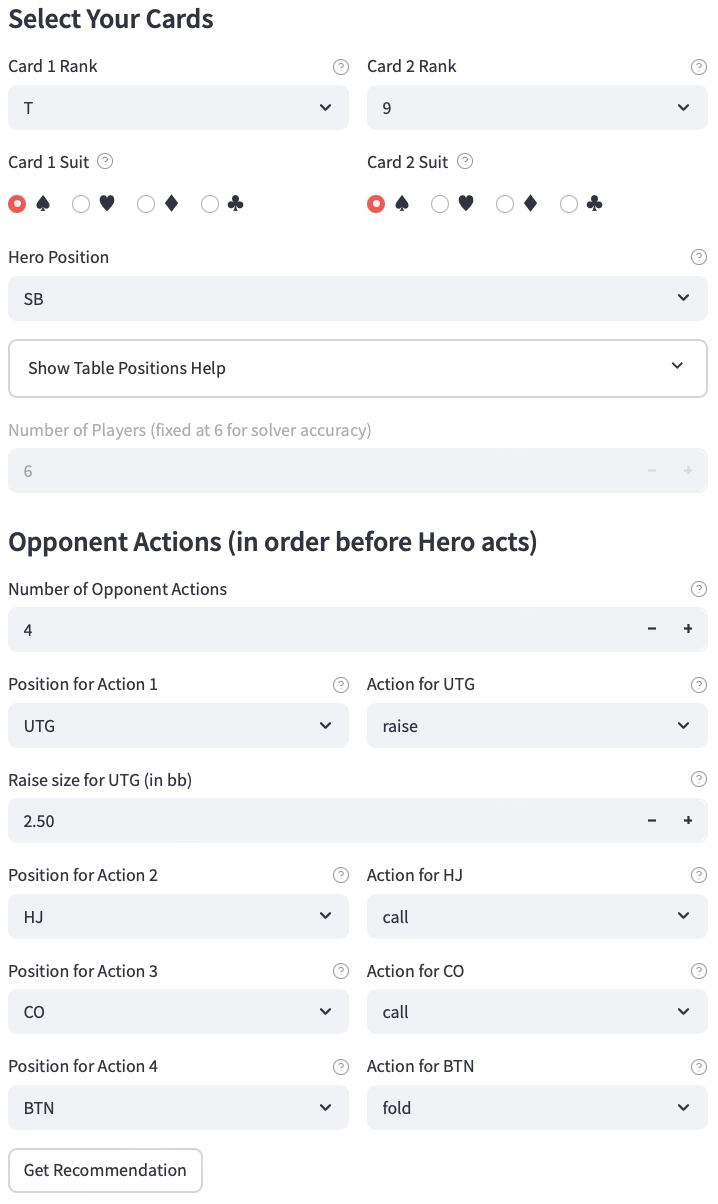

In [3]:
from IPython.display import Image, display
display(Image(filename="/Users/maximkurvink/Documents/GitHub/poker-decisions/src/images/interface_input.png"))


Model Recommendation Output

In [ ]:
from IPython.display import Image, display
display(Image(filename="/Users/maximkurvink/Documents/GitHub/poker-decisions/src/images/interface_output.png"))

# Inspiration
This package was inspired by my interest in poker strategy. The world of poker has seen a paradigm shift in the past four decades, going from a backroom intuitive game to a statistics-based, world wide game that everybody knows of. The game has evolved into one where the most knowledgable and insightful players see the most success. This is due to the increasing knowledge on statistics and the ability to share knowledge of these insights. Hundreds, if not thousands, of tables with correct decisions in different scenario's, with different raise sizes, incorporating variability of play and perfect strategy have become the standard in learning how to play proper poker. Although the current package does not come close to incorporating all that knowledge into one classifier, it incorporates a lot of the preflop knowledge for (common) 6-player games.

# Disclaimer
We strongly discourage using this app to aid in poker games where the use of any help is not allowed, or where disclosure of the usage is unclear. Additionally, the model this app relies on is imperfect, meaning that in some scenario's the app may not give the correct advice for the inputted scenario.